# Обучение с учителем
## Применение линейной регрессии

В этом задании вам предлагается изучить и применить на практике модели линейной регресии,
доступные в библиотеке `scikit-learn`.

Модель линейной регрессии имеет ряд проблем, связанных с переобучением. Другими словами, модель слишком точно приближает зависимость между признаками и целевой переменной на тренировочной выборке, и, как результат, делает достаточно грубые или неточные предсказания на новых данных. Регуляризация является эффективным решением данной проблемы. Введем понятие Гребневой Регрессии (Ridge Regression).

Сформулируем задачу минимизации функционала $Q(\beta)$ для нахождения линейной зависимости между целевой переменной $Y$ и признаками.

$$
\begin{equation*}
    Q(\beta) = \| Y - X \beta \|^2 + \lambda \| \beta \|^2 \rightarrow \min\limits_{\beta}.
\end{equation*}
$$

В данном случае, $X$ - матрица признаков, $\beta$ - вектор параметров, который требуется найти. Таким образом, мы добавляем к функции потерь регуляризатор с параметром $\lambda$, штрафующий большие значения вектора весов $\beta$. 

Настройка коэффициента регуляризации $\lambda$ - это важная задача в построении модели Гребневой регрессии.

## Загрузка и разбиение данных

Мы будем решать задачу линейной регресии на наборе данных `Boston House Prices`. Он представляет из себя набор различных факторов, которые некоторым образов влияют на среднюю рыночную цену дома в разных районах Бостона. Например, уровень преступности или среднее количество комнат. Наша задача - предсказать цену нового объекта, опираясь на значения этих признаков.

Начнем с загрузки этого набора данных и его разбиения. `Boston House Prices` является одним из втроенных наборов данных, доступных в `scikit-learn`. Для его загрузки достаточно вызвать функцию `load_boston` из `sklearn.datasets`. Далее, предлагается случайно разбить выборку на тренировочную и тестовую выборку, используя функцию `train_test_split` из `sklearn.model_selection`, вызвав ее с параметром `random_state=54` и `test_size=0.33`.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=54, test_size=0.33)

## Настройка параметра регуляризации в Гребневой регрессии

Модель Гребневой регрессии представлена классом `Ridge` из `sklearn.linear_model`. Конструктор этого класса содержит аргумент `alpha`, обратное значение которого соответствует параметру регуляризации $\lambda$. При использовании данной модели установите значение аргумента `random_state=42`. Найдите оптимальное значение коэффициента `alpha` в диапазоне `{10, 20, 30, ..., 90}` начиная со значения 10 до 90 с шагом 10, соответствующее минимальному значению среднеквадратической ошибки на тестовой выборке. Так же укажите это минимальное значение, округленное до трех знаков после запятой. Эти два значения будут являться первым `answer1` и вторым `answer2` ответом в этом практическом задание. Постройте график зависимости среднеквадратической ошибки от значения параметра `alpha`.

### *РЕШЕНИЕ*

In [24]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

mses = []
lambdas = []

for lamb in range(10, 100, 10):
    model_train = Ridge(alpha=lamb, random_state=42)
    model_train.fit(X_train, y_train)
    y_pred = model_train.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    lambdas.append(lamb)
    
minimum = min(msns)
mse_min_index = mses.index(minimum)
lambda_mse = lambdas[mse_min_index]
answer1, answer2 = lambda_mse, minimum
mses
print("Needful value of lambda: {}, minimal value of mse: {}".format(answer1, round(answer2, 3)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=60, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=70, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

Ridge(alpha=90, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

[23.577406074332583,
 23.346202568579073,
 23.210726124899388,
 23.146903891457942,
 23.131846027634108,
 23.149749882502057,
 23.189977020145893,
 23.24531804303734,
 23.310828657440528]

Needful value of lambda: 50, minimal value of mse: 23.132


Text(0.5, 1.0, 'Model dependence of lambdas & MSEs')

Text(0.5, 0, 'All lambdas')

Text(0, 0.5, 'All MSEs')

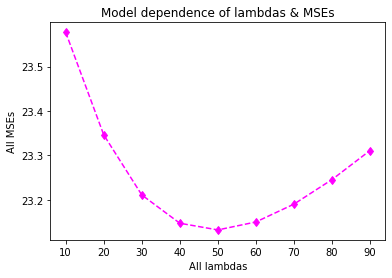

In [68]:
from matplotlib import pyplot as plt

plt.plot(lambdas, mses, '--d', color='magenta')
plt.title("Model dependence of lambdas & MSEs")
plt.xlabel("All lambdas")
plt.ylabel("All MSEs")
plt.show()

В результате, мы нашли оптимальное значение коэффициента `alpha` из предложенных, которое соответствует наиболее точной модели на новых данных. Таким образом, Гребневая регрессия собирает максимум информации из предложенных тренировочных данных.

## Метод регрессии LASSO

Еще одним методом регуляризации, похожем на Гребневую регрессию, является LASSO (least absolute shrinkage and selection operator). В данном случае, задача минимизации функции потерь формулируется следующим образом.

$$
\begin{equation*}
    \left\lbrace
        \begin{array}{c}
            Q(\beta) = \| Y - X \beta \|^2, \\
            \sum\limits_{i=0}^N |\beta_i| < \varkappa.
        \end{array}
    \right.
\end{equation*}
$$

При уменьшении значения $\varkappa$ все больше коэффициентов $\beta_i$ обнуляются. Таким образом, LASSO является своеобразным методом отбора признаков и понижения размерности, подробнее о которых вы узнаете на 4-й неделе нашего курса. Этот метод регуляризации выбирает самые информативные признаки, отбрасывая остальные.

Загрузите набор данных `Diabetes`, используя функцию `load_diabetes` из `sklearn.datasets`. `Diabetes` содержит в себе информацию о различных признаках, таких как возраст, пол, среднее кровяное давление человека и прочие. В качестве целевой переменной выступает количественный показатель прогрессирования заболевания диабет через год после определенного периода (baseline).

In [102]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

Метод LASSO представлен классом `Lasso` из `sklearn.linear_model`. Обучите эту модель на всем наборе данных `Diabetes`. Выберете в качестве параметра конструктора класса `random_state=42`. Какое количество признаков было отсеяно данной моделью? Для этого проанализируйте вектор весов `coef_`, являющийся атрибутом данной модели. В качестве ответа `answer3` на это задание приведите отношение числа выбранных моделью признаков к их общему числу. Ответ округлите до одного знака после запятой.

### *РЕШЕНИЕ*

In [101]:
from sklearn.linear_model import Lasso

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(diabetes.data, diabetes.target)
model_dia = Lasso(random_state=42)
model_dia.fit(X_train_dia, y_train_dia)
y_pred_dia = model_dia.predict(X_test_dia)

coef_counter = 0
n = 0
for coef in model_dia.coef_:
    n += 1
    if coef > 0:
        coef_counter += 1
    
answer3 = round(coef_counter/n, 1)
print("Coef dependency for Lasso: {}".format(answer3))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

Coef dependency for Lasso: 0.3


Далее обучите модель `Lasso` с параметром конструктора `random_state=42` на тренировочной выборке датасета `Boston House Prices` и посчитайте значение среднеквадратической ошибки на тестовой выборке. Приведите это значение в качестве ответа `answer4`, округленного до трех знаков после запятой. Сравните это значение с результатом, полученным Гребневой регрессией.

### *РЕШЕНИЕ*

In [76]:
model_train = Lasso(random_state=42)
model_train.fit(X_train, y_train)
y_pred = model_train.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
answer4 = mse
print("MSE_from_Lasso: {}".format(round(answer4, 3)))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

MSE_from_Lasso: 26.917


# Строка с ответами

In [99]:
output = "alpha: {0}\nmse error(ridge): {1:.3f}\nratio: {2:.1f}\nmse error(lasso): {3:.3f}"
print(output.format(answer1, answer2, answer3, answer4))

alpha: 50
mse error(ridge): 23.132
ratio: 0.3
mse error(lasso): 26.917
